<a href="https://colab.research.google.com/github/bogicho/FlyAI-5/blob/main/Day6_ML_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANN MNIST

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf

# 1. MNIST 데이터셋 임포트
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. 데이터 전처리
x_train, x_test = x_train/255.0, x_test/255.0

# 3. 모델 구성
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 4. 모델 컴파일-#sparse_categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# 4. 모델 컴파일-# categorical_crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 5. 모델 훈련
hist=model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))

# 6. 정확도 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 정확도:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0202 - accuracy: 0.9931 - val_loss: 0.0606 - val_accuracy: 0.9816
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.0804 - val_accuracy: 0.9782
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0136 - accuracy: 0.9954 - val_loss: 0.0735 - val_accuracy: 0.9820
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0131 - accuracy: 0.9954 - val_loss: 0.0832 - val_accuracy: 0.9801
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9816
테스트 정확도: 0.9815999865531921


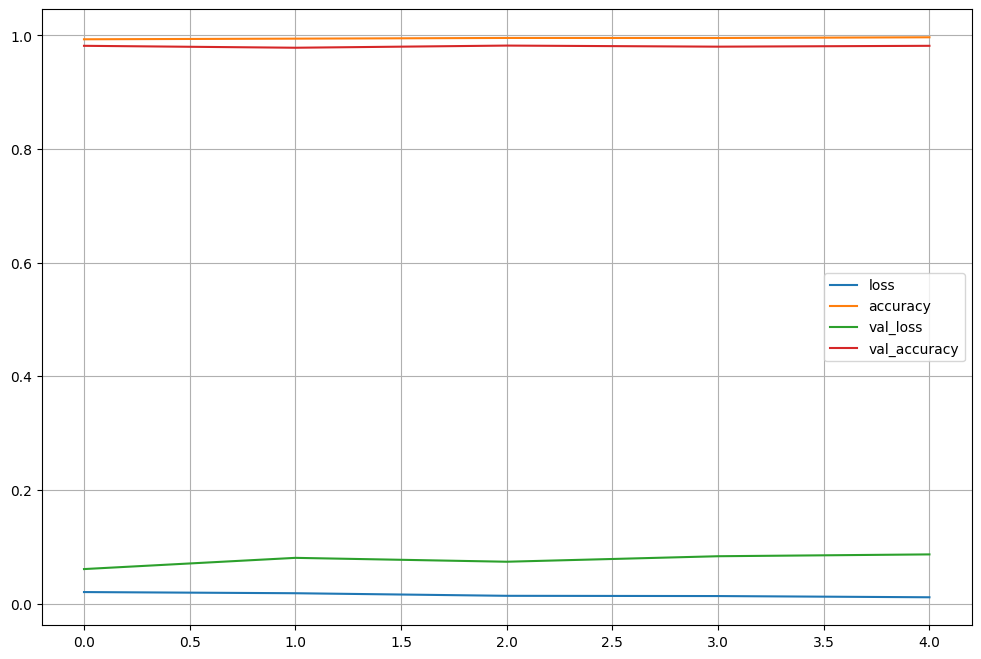

In [ ]:
#7. 그래프로보기
import matplotlib.pyplot as plt

plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [ ]:
#8. 테스트

score = model.evaluate(x_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9816
Test Loss : 0.08645732700824738
Test Accuracy  : 0.9815999865531921


In [ ]:
#9. 데이터 예측

import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 1ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
#10. 틀린데이터 수 확인

wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

184

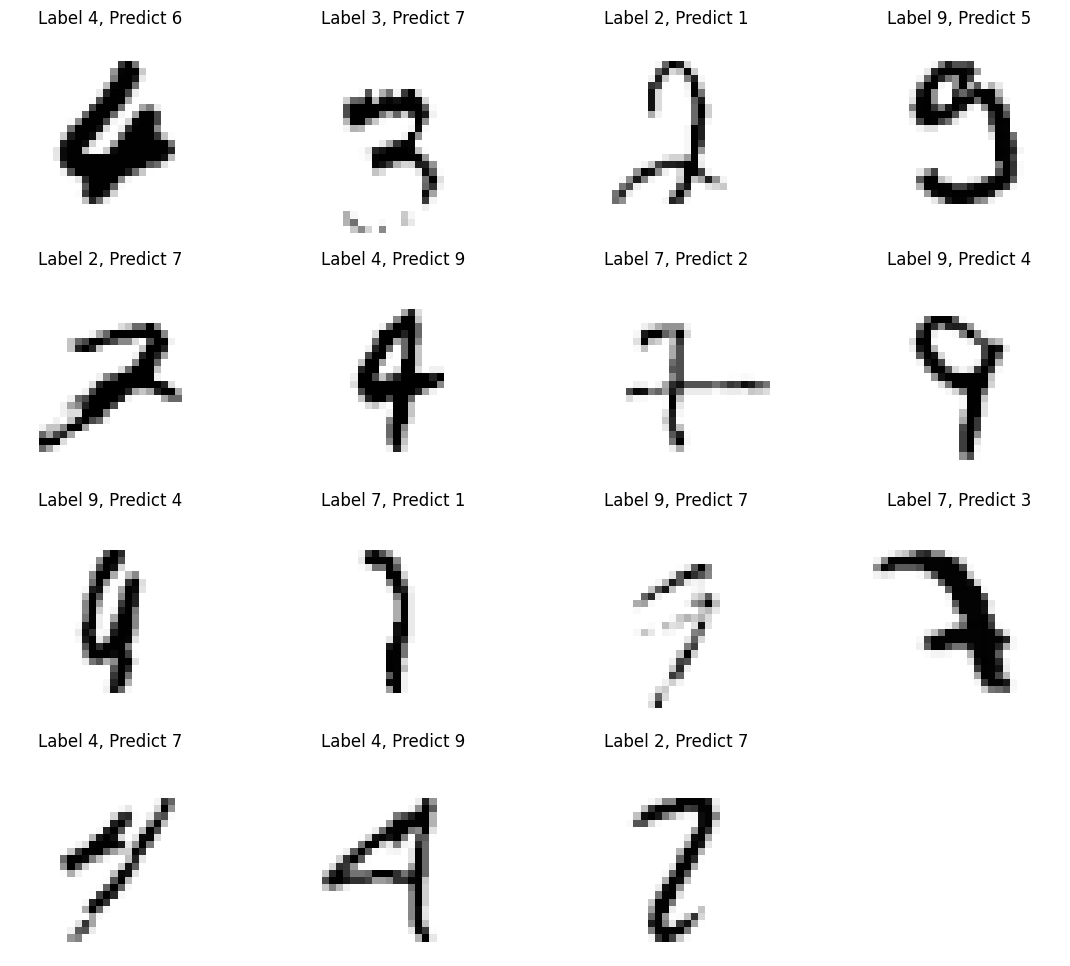

In [ ]:
#11. 틀린데이터 10개 그려보기

import random

samples = random.choices(population=wrong_result, k=15)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(x_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [ ]:
# 12. 모델 저장
model.save('MNIST_ANN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#CNN MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import time #모델 컴파일 시간 확인

#1. 데이터 불러오기
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((60000, 28 ,28, 1))
X_test = X_test.reshape((10000, 28 ,28, 1))

#2. 모델구성
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5, 5),
                  strides=(1, 1),
                  padding='same',
                  activation='relu',
                  input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2)),
    layers.Conv2D(64, kernel_size=(2, 2),
                  activation='relu',
                  padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

#3. 모델컴파일
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
start_time = time.time()

#4. 모델 훈련
hist = model.fit(X_train, y_train,
                 epochs=5,
                 verbose = 1,
                 validation_data=(X_test, y_test))
print(f'Fit Time :{time.time() - start_time}')

#5. 모델 정확도
test_loss, test_acc = model.evaluate(X_test, y_test)
print('테스트 정확도:', test_acc)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

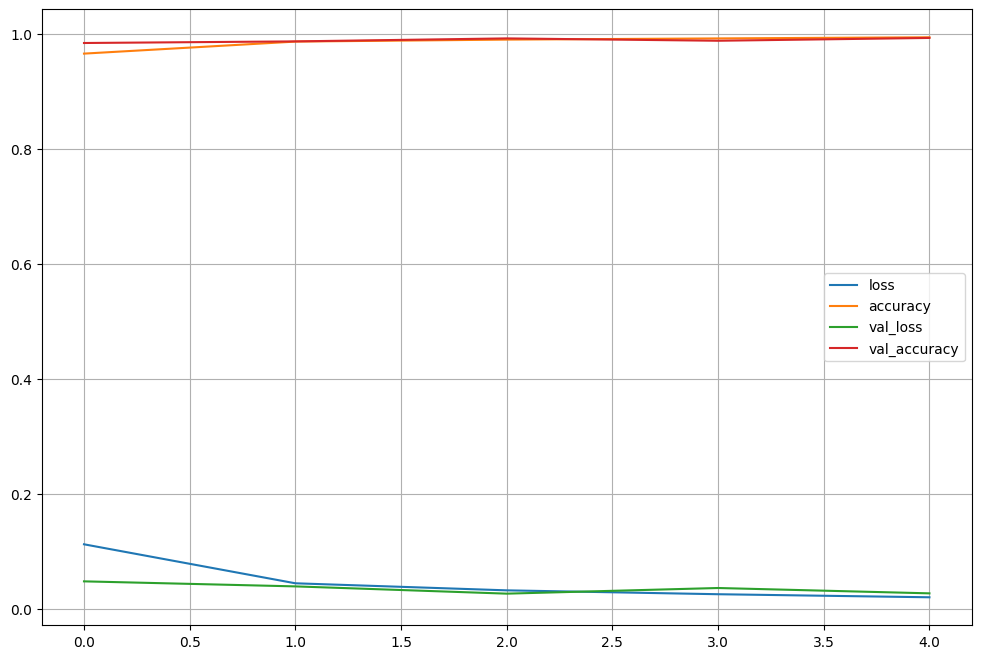

In [ ]:
#6. 그래프로 출력

import matplotlib.pyplot as plt

plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()

In [ ]:
#7. 테스트

score = model.evaluate(X_test, y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy  : {score[1]}')

313/313 [==============================] - 6s 18ms/step - loss: 0.0264 - accuracy: 0.9926
Test Loss : 0.026409780606627464
Test Accuracy  : 0.9926000237464905


In [ ]:
#8. 데이터 예측
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result,  axis=1)
predicted_labels[:10]

313/313 [==============================] - 6s 20ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
#9. 틀린 데이터만 모으기
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

74

##총 1만개 데이터 중에 74개를 틀림

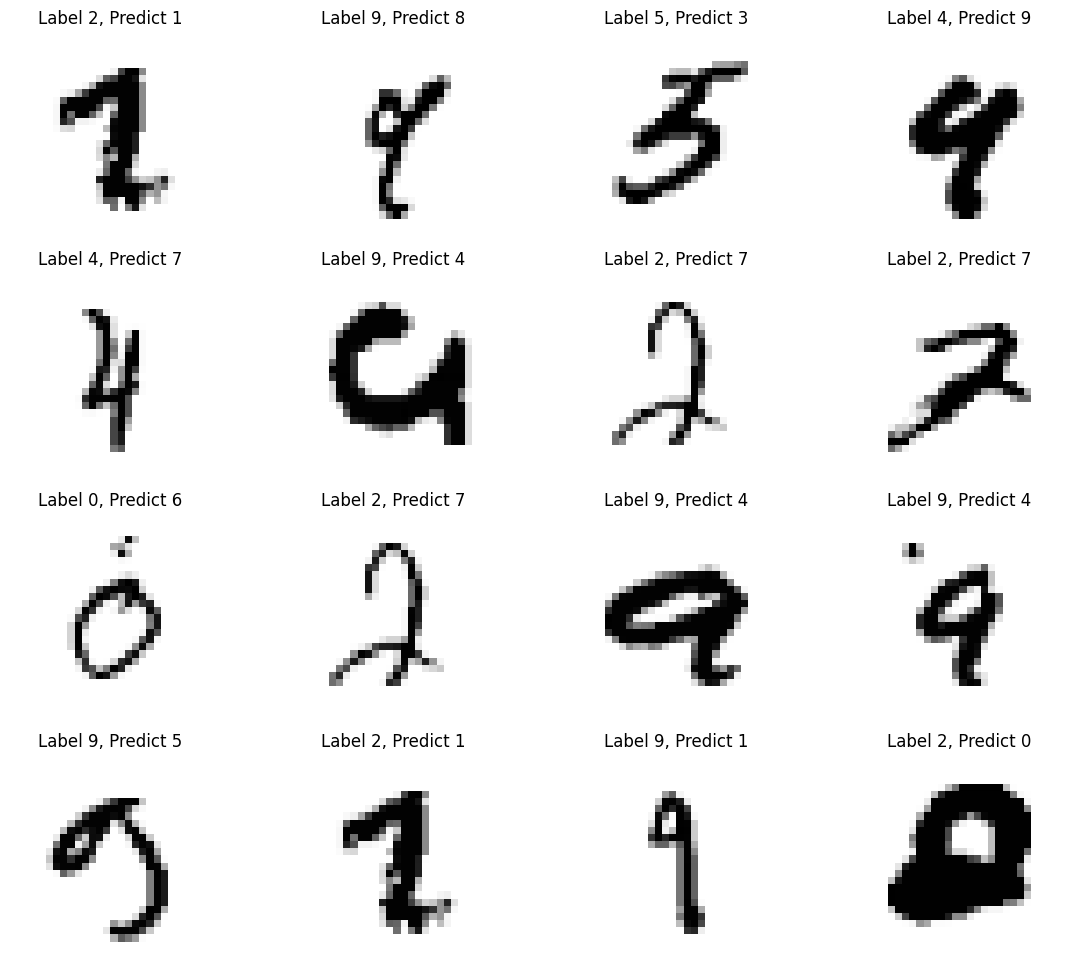

In [ ]:
#10. 틀린 데이터 16개만 직접 그려보기
import random

samples = random.choices(population=wrong_result, k =16)

plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx + 1)
    plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys', interpolation='nearest')
    plt.title('Label ' + str(y_test[n]) + ', Predict ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

In [ ]:
#11. Model Save
model.save('MNIST_CNN_model.h5')

# 2. fashion-MNIST
- 70,000개의 흑백이미지로 구성
- 각 이미지는 (28,28) 2차원 텐서로 구성
- 흑백이미지(채널에 해당하는 차원은 없음)
- 라벨정보는 각각의 이미지의 범주에 해당하는 id정보로 0-9 정수로 구성
    - 0 : T-shirt/top
    - 1 : Trouser
    - 2 : Pullover
    - 3 : Dress
    - 4 : Coat
    - 5 : Sandal
    - 6 : Shirt
    - 7 : Sneaker
    - 8 : Bag
    - 9 : Ankel boot
- 처리과정
  - 전처리
    - 데이터 셋 분리(학습/테스트)
    - 데이터 전처리(scaling/형변환/원핫인코딩)
    - 학습/검증 데이터 분리
   - 학습, 검증, 테스트 데이터셋 생성
  -모델링
    - 모델생성
    - 모델학습
  - 모델 성능평가
    - dropout
  - 시각화

In [ ]:
#1. 데이터불러오기
import tensorflow as tf
from tensorflow import keras
import keras.datasets as d
import numpy as np
from tensorflow.keras.utils import to_categorical

fmnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fmnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


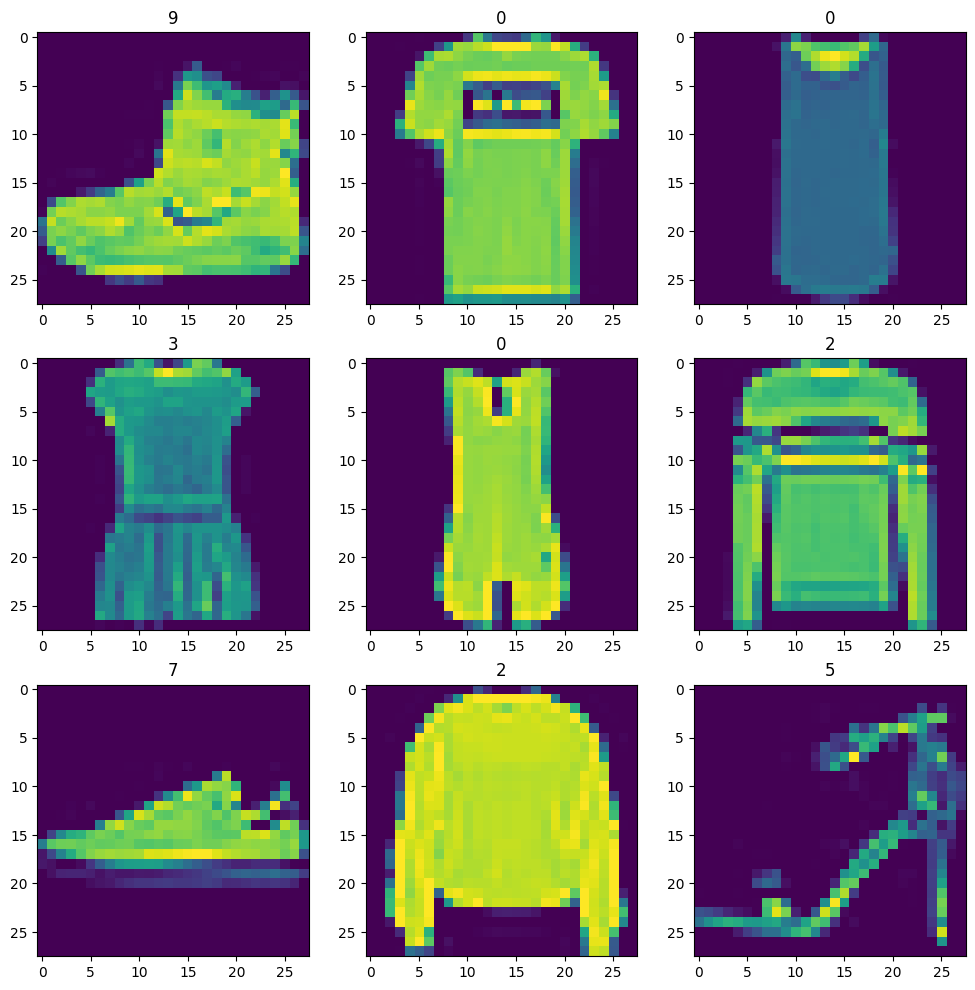

In [ ]:
#1-1 데이터 확인(9장 시각화)
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.title(y_train[i])
    plt.imshow(X_train[i])


In [ ]:
#2. 데이터 전처리
#데이터 정규화 (0-255)

X_train2 = X_train[:,:,:,np.newaxis] #차원 증가(3차원으로, reshape의 효과)
X_test2 = X_test[:,:,:,np.newaxis]

X_train2 = X_train2/255
X_test2 = X_test2/255

In [ ]:
#3. data 분리

y_train2 = to_categorical(y_train,10)
y_test2 = to_categorical(y_test,10)

In [ ]:
#4. 모델 생성

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D

model = Sequential()
model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 strides=(1,1),padding='Same',
                 activation = 'relu',
                 input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='Same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='Same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = 'softmax'))

> fashion mnist data는 mnist에 비해 이미지의 특징적인 것들이 많으므로 Conv2D -> maxpooling을 반복하면서 노이즈를 제거했다. Flatten, FC layer들을 거치고 Dropout을 시켜 모델을 생성


In [ ]:
#5. 모델 컴파일

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 32)         

In [ ]:
hist = model.fit(X_train2,y_train2,
                 epochs = 3 ,
                 batch_size = 100,
                 verbose=2)
loss,acc = model.evaluate(X_test2,y_test2)
print('loss:', round(loss,3))
print('accurate:', round(acc,3))

Epoch 1/3
600/600 - 7s - loss: 0.7467 - accuracy: 0.7297 - 7s/epoch - 12ms/step
Epoch 2/3
600/600 - 2s - loss: 0.4247 - accuracy: 0.8503 - 2s/epoch - 4ms/step
Epoch 3/3
600/600 - 2s - loss: 0.3570 - accuracy: 0.8749 - 2s/epoch - 4ms/step
313/313 [==============================] - 1s 3ms/step - loss: 0.3280 - accuracy: 0.8808
loss: 0.328
accurate: 0.881


#Shape (ANN)

In [ ]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, re, glob
import cv2  #openCV 라이브러리 import하기
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, Y,
                                                 test_size = 0.2,
                                                 random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.2,
                                                  random_state = 42)
print('X_train : ', X_train.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train :  (2304, 28, 28, 3)
X_val :  (576, 28, 28, 3)
X_test :  (720, 28, 28, 3)


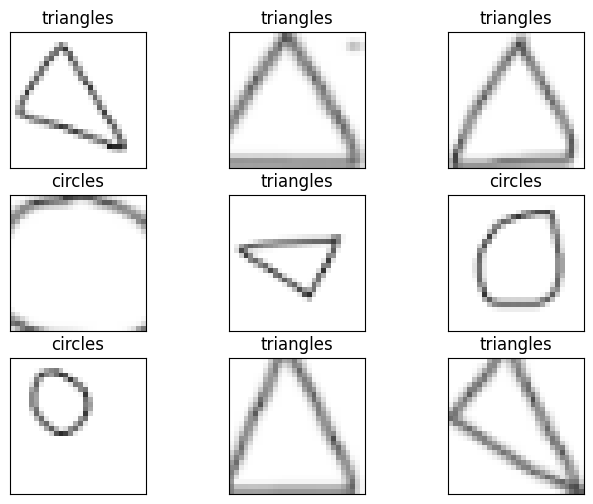

In [ ]:
import matplotlib.pyplot as plt

samples = np.random.randint(len(X_train), size=9)
class_names = ['circles', 'squares', 'triangles']

plt.figure(figsize = (8, 6))

for i, idx in enumerate(samples):
   plt.subplot(3, 3, i+1)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(X_train[idx], cmap = 'gray')
   plt.title(class_names[y_train[idx]])
plt.show()

#**도형 맞추기(CNN)**
- 삼각형, 사각형 원형 도형을 학습해서 맞추기


In [ ]:
!pip install keras

In [ ]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, re, glob
import cv2  #openCV 라이브러리 import하기
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def show_aug_image(image, generator, n_images=4):
    # ImageDataGenerator는 여러개의 image를 입력으로 받기 때문에 4차원으로 입력 해야함.
    image_batch = np.expand_dims(image, axis=0)
    # featurewise_center or featurewise_std_normalization or zca_whitening 가 True일때만 fit 해주어야함
    generator.fit(image_batch)
    # flow로 image batch를 generator에 넣어주어야함.
    data_gen_iter = generator.flow(image_batch)
    result=[]
    for i in range(n_images):
    	#generator에 batch size 만큼 augmentation 적용(매번 적용이 다름)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('float')
        aug_image/=255
        result.append(aug_image)
    return result


In [ ]:
imagePath = '/content/drive/MyDrive/Colab Notebooks/shapes'
categories = ['circles', 'squares', 'triangles']
nb_classes = len(categories)

data_generator_horizontal = ImageDataGenerator(horizontal_flip=True)
data_generator_vertical = ImageDataGenerator(vertical_flip=True)
data_generator_zoom = ImageDataGenerator(zoom_range=[0.5, 0.9])

X = []
for idx, cate in enumerate(categories):
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    image_dir = imagePath+'/'+cate+'/'
    for top, dir, f in os.walk(image_dir):
        for filename in f:
            image = cv2.cvtColor(cv2.imread(image_dir+filename), cv2.COLOR_BGR2RGB)
            X+=show_aug_image(image, data_generator_horizontal, n_images=4)
            X+=show_aug_image(image, data_generator_vertical, n_images=4)
            X+=show_aug_image(image, data_generator_zoom, n_images=4)

X = np.array(X)
Y = np.concatenate([np.zeros(1200), np.full(1200, 1), np.full(1200, 2)])
Y=Y.astype(int)
print('X_Shape :' , X.shape)
print('Y_Shape :' , Y.shape)

X_Shape : (3600, 28, 28, 3)
Y_Shape : (3600,)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
            X, Y,
            test_size = 0.2,
            random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train,
            test_size = 0.2,
            random_state = 42)

print('X_train : ', X_train.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train :  (2304, 28, 28, 3)
X_val :  (576, 28, 28, 3)
X_test :  (720, 28, 28, 3)


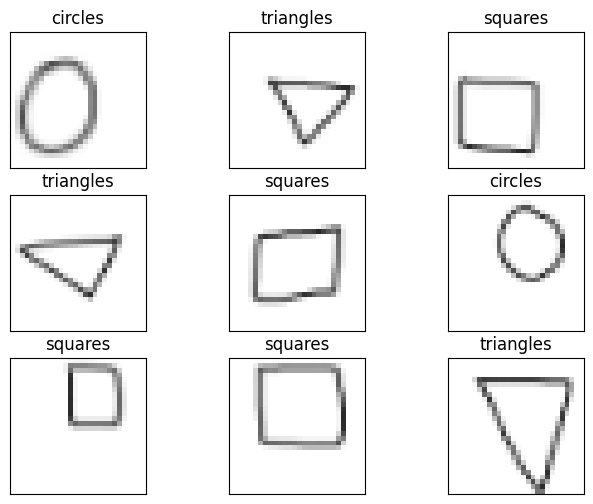

In [ ]:
import matplotlib.pyplot as plt

samples = np.random.randint(len(X_train), size=9)
class_names = ['circles', 'squares', 'triangles']

plt.figure(figsize = (8, 6))

for i, idx in enumerate(samples):
   plt.subplot(3, 3, i+1)
   plt.xticks([])
   plt.yticks([])
   plt.imshow(X_train[idx], cmap = 'gray')
   plt.title(class_names[y_train[idx]])
plt.show()

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit_generator(
        X_train,
        steps_per_epoch=15,
        epochs=50,
        validation_data=X_test,
        validation_steps=5)

# CIFAR10 CNN(keras)
- 이미지 크기 정규화
- 0-1 사이값이 되도록 정규화(원래이미지 0-255)
  - conv-conv-pool-dense
  - conv-conv-pool-dense
  - conv-pool-dense
  - conv-pool-dense
  -flaten
  -dense-dropout
  -dense-dropout



In [ ]:
#1. 데이터로딩(케라스)
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
#2. 데이터 전처리
#이미지정규화(0~255 데이터를 0~1로 정규화)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
#3. 원핫인코딩하기
import keras
from keras.utils import to_categorical

num_classes = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#4. 훈련데이터, 검증데이터 분류
(x_train, x_val) = x_train[5000:], x_train[:5000]
(y_train, y_val) = y_train[5000:], y_train[:5000]

In [ ]:
#4-1 훈련/테스트 데이터, 검증데이터 shape확인
print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_val : ",x_val.shape)
print("y_val :",y_val.shape)
print("x_test : ",x_test.shape)
print("y_test",y_test.shape)


x_train :  (45000, 32, 32, 3)
y_train :  (45000, 10)
x_val :  (5000, 32, 32, 3)
y_val : (5000, 10)
x_test :  (10000, 32, 32, 3)
y_test (10000, 10)


In [ ]:
#5. CNN 모델링
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model=Sequential()

In [ ]:
#5-1. 컨볼류션 레이어 쌓기
#첫번째 Conv , 학습파라미터 16*2*2*3+16=208
model.add(Conv2D(filters = 16,
                 kernel_size = 2,
                 padding='same',
                 activation='relu',
                 input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=2))

#두번째 Conv, 32*2*2*16+32=2080
model.add(Conv2D(filters = 32,
                 kernel_size = 2,
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

#세번째 Conv, 64*2*2*32+64=8256
model.add(Conv2D(filters = 64,
                 kernel_size = 2,
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

In [ ]:
#5-2 드롭아웃 층 쌓기
model.add(Dropout(0.25))

In [ ]:
#5-3 1차원으로 바꾸기
model.add(Flatten())

In [ ]:
#5-4 FC 층 쌓기
#dense층 학습 파라미터 : (4*4*64)*500+500=512,500
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))

#dense층 학습 파라미터 : 500*10+10=5,010
model.add(Dense(10, activation='softmax'))


In [ ]:
#6 요약
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 64)         

## 모델 컴파일 및 모델 학습과 평가
###(1) loss='categorical_crossentropy', optimizer='rmsprop'

In [ ]:
#1. 모델 컴파일(categorical_crossentropy)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [ ]:
#2. 모델학습
from keras.callbacks import ModelCheckpoint

checkpoint= ModelCheckpoint(filepath='model.weights.best.hdf5',
                            vervose =1,
                            save_best_only=True)
hist = model.fit(x_train, y_train,
                 batch_size=32,
                 epochs=10,
                 validation_data=(x_val, y_val),
                 callbacks=[checkpoint],
                 verbose=2,
                 shuffle=True)

Epoch 1/10
1407/1407 - 7s - loss: 1.6066 - accuracy: 0.4160 - val_loss: 1.4058 - val_accuracy: 0.4978 - 7s/epoch - 5ms/step
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1407/1407 - 5s - loss: 1.2541 - accuracy: 0.5497 - val_loss: 1.1826 - val_accuracy: 0.5604 - 5s/epoch - 4ms/step
Epoch 3/10
1407/1407 - 6s - loss: 1.1162 - accuracy: 0.6050 - val_loss: 1.1721 - val_accuracy: 0.5844 - 6s/epoch - 4ms/step
Epoch 4/10
1407/1407 - 5s - loss: 1.0380 - accuracy: 0.6342 - val_loss: 0.9593 - val_accuracy: 0.6682 - 5s/epoch - 3ms/step
Epoch 5/10
1407/1407 - 5s - loss: 0.9898 - accuracy: 0.6529 - val_loss: 0.9292 - val_accuracy: 0.6772 - 5s/epoch - 4ms/step
Epoch 6/10
1407/1407 - 5s - loss: 0.9529 - accuracy: 0.6687 - val_loss: 0.9428 - val_accuracy: 0.6772 - 5s/epoch - 4ms/step
Epoch 7/10
1407/1407 - 5s - loss: 0.9240 - accuracy: 0.6799 - val_loss: 0.9164 - val_accuracy: 0.6884 - 5s/epoch - 4ms/step
Epoch 8/10
1407/1407 - 5s - loss: 0.9115 - accuracy: 0.6857 - val_loss: 0.9941 - val_accuracy: 0.6654 - 5s/epoch - 4ms/step
Epoch 9/10
1407/1407 - 5s - loss: 0.9022 - accuracy: 0.6906 - val_loss: 1.0756 - val_accuracy: 0.6266 - 5s/epoch - 3ms/step
Epoch 10/10
1407/14

In [ ]:
#3. 최상 val_acc
model.load_weights('model.weights.best.hdf5')

In [ ]:
#4. 모델평가
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.9415051937103271
Test accuracy: 0.6712999939918518


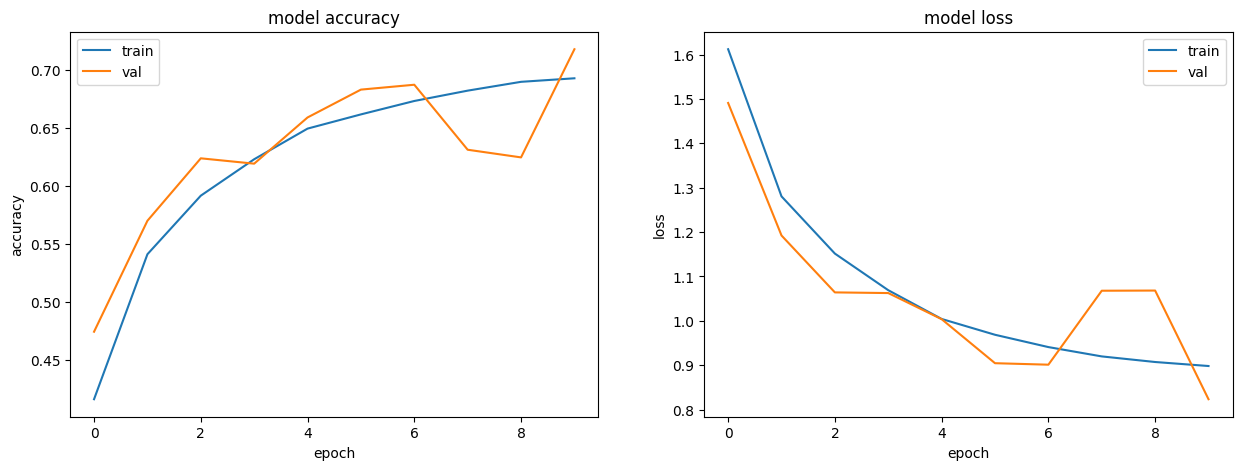

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # Use plt.subplots() to create multiple subplots

# model accuracy
plt.subplot(1, 2, 1)  # Access the first subplot
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

# model loss
plt.subplot(1, 2, 2)  # Access the second subplot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()


# CIFAR 10 데이터 증강


###(2) loss=sparse_categorical_crossentropy
- optimizer='adam'
- batch size=256
- epoch=250

In [ ]:
#1. 데이터로딩(케라스)
import cv2  #openCV 라이브러리 import하기
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def show_aug_image(image, generator, n_images=4):
    # ImageDataGenerator는 여러개의 image를 입력으로 받기 때문에 4차원으로 입력 해야함.
    image_batch = np.expand_dims(image, axis=0)
    # featurewise_center or featurewise_std_normalization or zca_whitening 가 True일때만 fit 해주어야함
    generator.fit(image_batch)
    # flow로 image batch를 generator에 넣어주어야함.
    data_gen_iter = generator.flow(image_batch)
    result=[]
    for i in range(n_images):
    	#generator에 batch size 만큼 augmentation 적용(매번 적용이 다름)
        aug_image_batch = next(data_gen_iter)
        aug_image = np.squeeze(aug_image_batch)
        aug_image = aug_image.astype('float')
        aug_image/=255
        result.append(aug_image)
    return result

In [ ]:
#2. 데이터 전처리
#이미지정규화(0~255 데이터를 0~1로 정규화)
x_train = x_train.astype('float32')   # 타입 변경 ( 255로 나누기 위해서 )
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape', x_train.shape)
print(x_train.shape[0] , ' train sample')
print(x_test.shape[0], ' test sample')

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train shape (50000, 32, 32, 3)
50000  train sample
10000  test sample


In [ ]:
#3. 모델 생성
model = Sequential()

# 32 : filter 수
# 3x3 filter
# 입력데이터 : 128x 28x 28x 1 => (128 x 26 x 26 x 32)
# padding : valid(default)
model.add(Conv2D(32, 3, 3 ,
                 activation='relu',
                 input_shape=(28,28,3)))   # activation : relu : 음수 제거
# 아웃풋 :  32 x 24 x 24 x 64
model.add(Conv2D(64,3,3,
                 activation = 'relu'))
# 32 x 12 x 12 x 64
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# 12 x 12 x 64 가 1차원으로 됨( 9216 )
model.add(Flatten())

# FFNN망 (=FC망)
# input : 128 x 9216
# 가중치 : 9216 x 128
# output : 128 x 128
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))  # 계산회로만 생략

# input : 128 x 128
# 가중치 : 128 x 10
# output : 128 x 10
model.add(Dense(10, activation='softmax'))

In [ ]:
#4. 모델 fit()
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.Adadelta(),
             metrics = ['accuracy'])

# train,validation //// test
class AccuracyHistory(keras.callbacks.Callback):
    # 오버라이딩 ( 재정의 )
    def on_train_begin(self, logs={}):  # 훈련 시작 시 이벤트 발생
        self.acc =[]
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

hist=model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    verbose =1,
          validation_data = (x_test, y_test),
          callbacks = [history])
score = model.evaluate(x_test, y_test, verbose=0)

score[0] # loss값
score[1] # accuracy 값

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
#2-1 데이터 증강

from tf.keras.models import Sequential
from tf.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tf.keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator
import numpy as np

gen=ImageDataGenerator(rotation_range=20,
                       shear_range=0.2,
                       width_shift_range=0.2,
                       height_shift_range=0.2,
                       horizontal_flip=True)
#150%
augment_ratio=1.5
augment_size=int(x_train.shape[0]*augment_ratio)

randidx=np.random.randint(x_train.shape[0],size=augment_size)
#원본데이터 복사copy()
x_aug=x_train[randidx].copy()
y_aug=y_train[randidx].copy()

In [ ]:
x_aug, y_aug = gen.flow(x_aug, y_aug,
                        batch_size=augment_size,
                        shuffle=False).next()

x_train=np.concatenate((x_train,x_aug))
y_train=np.concatenate((y_train,y_aug))

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (200000, 32, 32, 3)
y_train shape: (200000, 1)


In [ ]:
# 증강된 데이터를 학습데이터로 사용하고 정답 데이터를 랜덤하게 섞음
s=np.arange(x_train.shape[0])
np.random.shuffle(s)

x_train=x_train[s]
y_train=y_train[s]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

#5-1. 컨볼류션 레이어 쌓기
cnn = Sequential()

cnn.add(Conv2D(32,(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3), activation='relu', padding='same'))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3), activation='relu', padding='same'))
cnn.add(Conv2D(64,(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(256,(3,3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
#3차원 텐서를 1차원 벡터로 변환
cnn.add(Flatten())

cnn.add(Dense(128, activation='relu')) #은닉층
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))#출력층

In [ ]:
#6 요약
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 dropout_14 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_20 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                      

## 모델 컴파일 및 모델 학습과 평가
###(1) loss='categorical_crossentropy', optimizer='adam'

In [ ]:
#1. 모델 컴파일(categorical_crossentropy)
cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
#2. 모델학습
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical

checkpoint= ModelCheckpoint(filepath='cnn.weights.best.hdf5',
                            vervose =1,
                            save_best_only=True)

# one-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=10)
y_val_encoded = to_categorical(y_val, num_classes=10)
print("x_train shape:", x_train.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("x_val shape:", x_val.shape)
print("y_val_encoded shape:", y_val_encoded.shape)

hist2 = cnn.fit(x_train, y_train_encoded, # Use encoded labels
                 batch_size=256,
                 epochs=250,
                 validation_data=(x_val, y_val_encoded))

In [ ]:
#3. 최상 val_acc
cnn.load_weights('model.weights_CNN_agumented.best.hdf5')

In [ ]:
#4. 모델평가
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.9425334930419922
Test accuracy: 0.6743000149726868


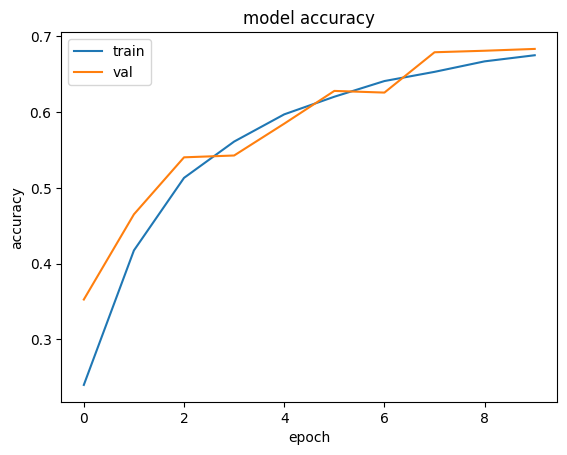

In [ ]:
#5. 시각화
import matplotlib.pyplot as plt

plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Data Augmention Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.grid
plt.show()

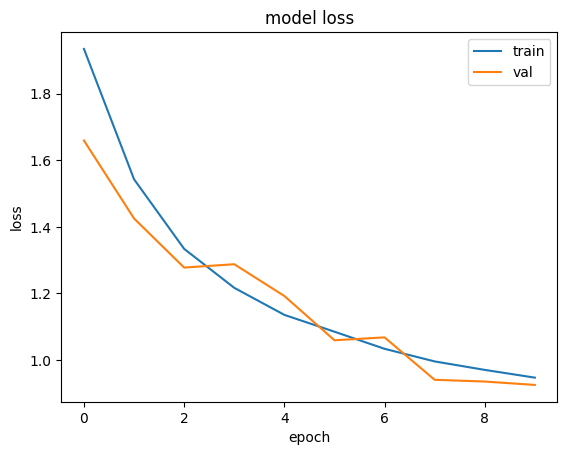

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Data Augmention Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.grid
plt.show()

#케글 데이터 연동하기
- !pip install kaggle

In [ ]:
!pip install kaggle

In [ ]:
#케글 json upload

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"youngbokcho","key":"ed8a5ef7d0c7dc1a347a60d0cdfc185c"}'}

In [ ]:
# 케글 파일 만들기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 이 일어나지 않도록
!chmod 600 ~/.kaggle/kaggle.json

# 케글 제이슨 파일 제대로 설치 됬는지 확인
!ls -lha kaggle.json # kaggle.json 이렇게 뜸


-rw-r--r-- 1 root root 67 Jul  1 10:06 kaggle.json


In [ ]:
!kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           6645        138  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           5259        111  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26          13138        231  1.0              
anthonytherrien/restaurant-revenue-prediction-dataset           R

In [ ]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
100% 612M/612M [00:20<00:00, 38.6MB/s]
100% 612M/612M [00:20<00:00, 31.6MB/s]


In [ ]:
# zip 파일 풀기

!unzip /content/gtsrb-german-traffic-sign.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  inflating: train/

In [ ]:
#
import pandas as pd
import numpy as np

import os
import pathlib

import cv2 #영상처리에 사용하는 오픈소스 라이브러리, 컴퓨터가 사람 눈처럼 인식할 수 있게 처리
from PIL import Image # 파이썬 이미지 처리 pillow 라이브러리
from tensorflow.keras.preprocessing import image


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator #imagedatagenerater는 이미지를 학습시킬 때 학습 데이터의 양이 적을 경우 학습데이터를 조금씩 변형 시켜서 학습데이터의 양을 늘리는 방식중 하나
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')#그래프 스타일 지정

In [ ]:
#난수 랜덤성 고정
np.random.seed(42)

%matplotlib inline

In [ ]:
# 코렙은 좌측 파일 아이콘 클릭해서 마운팅된 파일 하나를 오른쪽 마우스 클릭하면 경로 카피할 수 있음
data_dir = pathlib.Path('/content/Meta')
train_path = pathlib.Path('/content/Train')
test_path = pathlib.Path('/content/Test')

In [ ]:
# 전처리: 이미지 별로 사이즈가 다르기 때문에 이미지의 폭과 높이를 같은 크기로 통일
IMG_HEGHT = 30
IMG_WIDTH = 30
channels = 3

In [ ]:
# 카테고리 수 확인
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

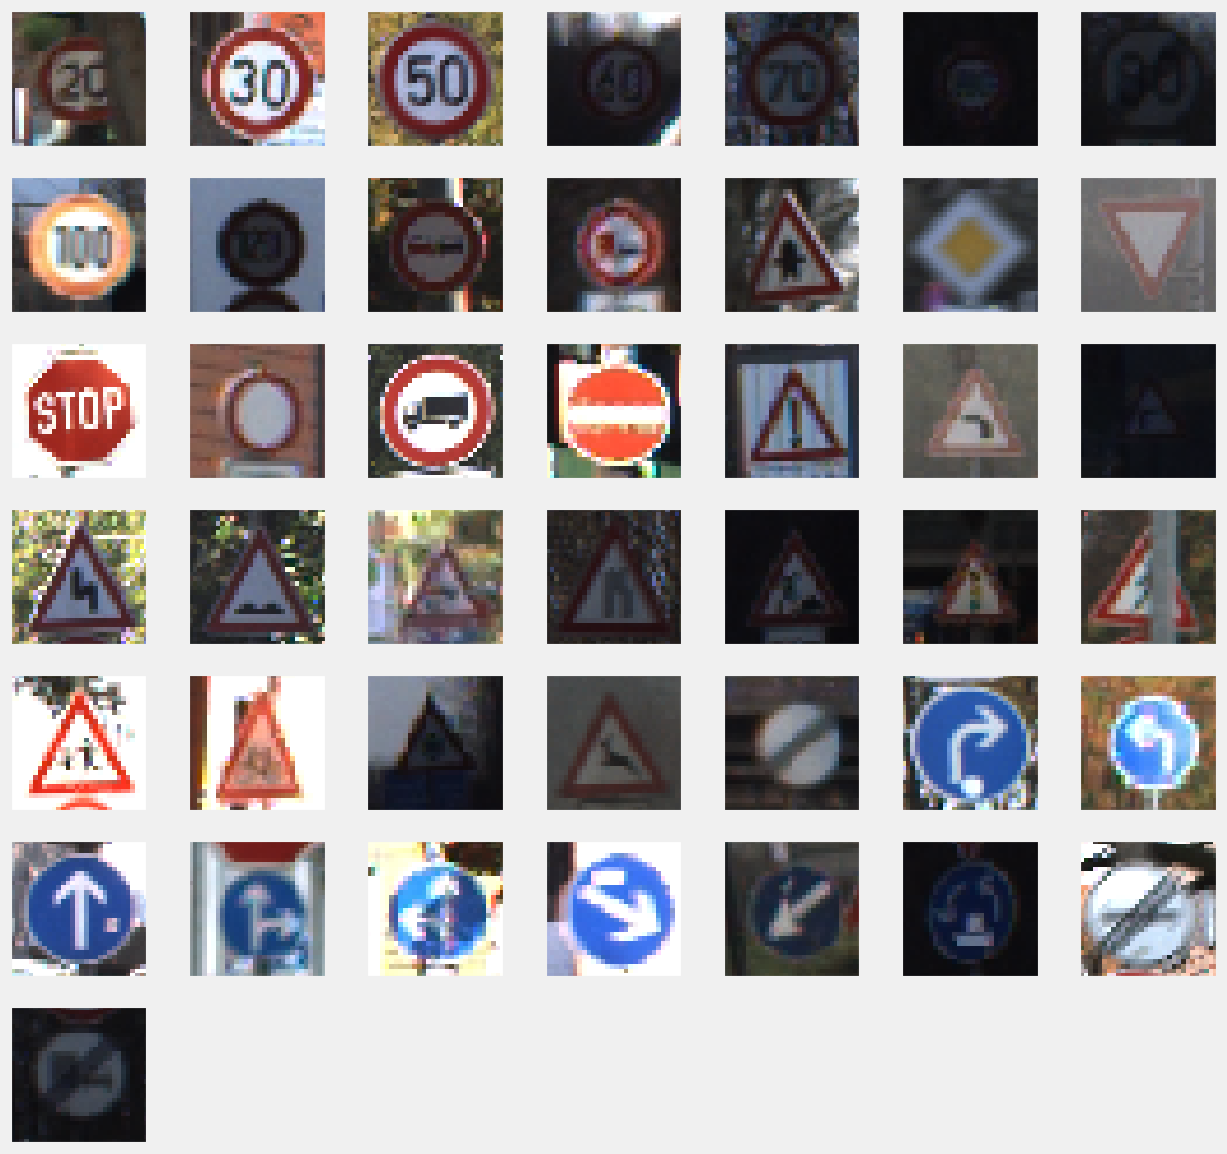

In [ ]:
# 모든 교통표시판 시각화
# pathlib모듈을 사용하면, 파일, 디렉토리(폴더)의 경로를 객체로써 조작하거나 처리할 수 있다

img_dir = pathlib.Path('/content/train')
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([]) #눈금 설정 없음
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0] #glob모듈의 glob함수는 사용자가 제시한 조건에 맞는 파일명을 리스트형식으로 반환 #*(아스터리스크)는 임의 길이의 모든 문자열을 의미
    img = load_img(sign, target_size=(30, 30))
    plt.imshow(img)
plt.show()

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

In [ ]:
#os.listdir() 매써드는 지정한 디렉토리 내의 모든 파일과 디렉토리 리스트(list)를 리턴
folders = os.listdir('/content/train')

In [ ]:
train_num = []
class_num = []

for folder in folders:
  train_files = os.listdir(str(train_path) + '/'+ folder) #리스트로 가져오면 에러떠서 str로 변환해줌
  train_num.append(len(train_files))
  class_num.append(classes[int(folder)])

In [ ]:
# 각각의 클래스의 이미지의 수에 기초해 데이터셋 분류하기
zipped_lists =  zip(train_num, class_num)
sorted_pairs = sorted(zipped_lists)
tuples =  zip(*sorted_pairs) # sorted(정렬할 데이터), 새로운 정렬된 리스트로 만들어서 반환
train_num, class_num = [ list(tuple) for tuple in tuples]

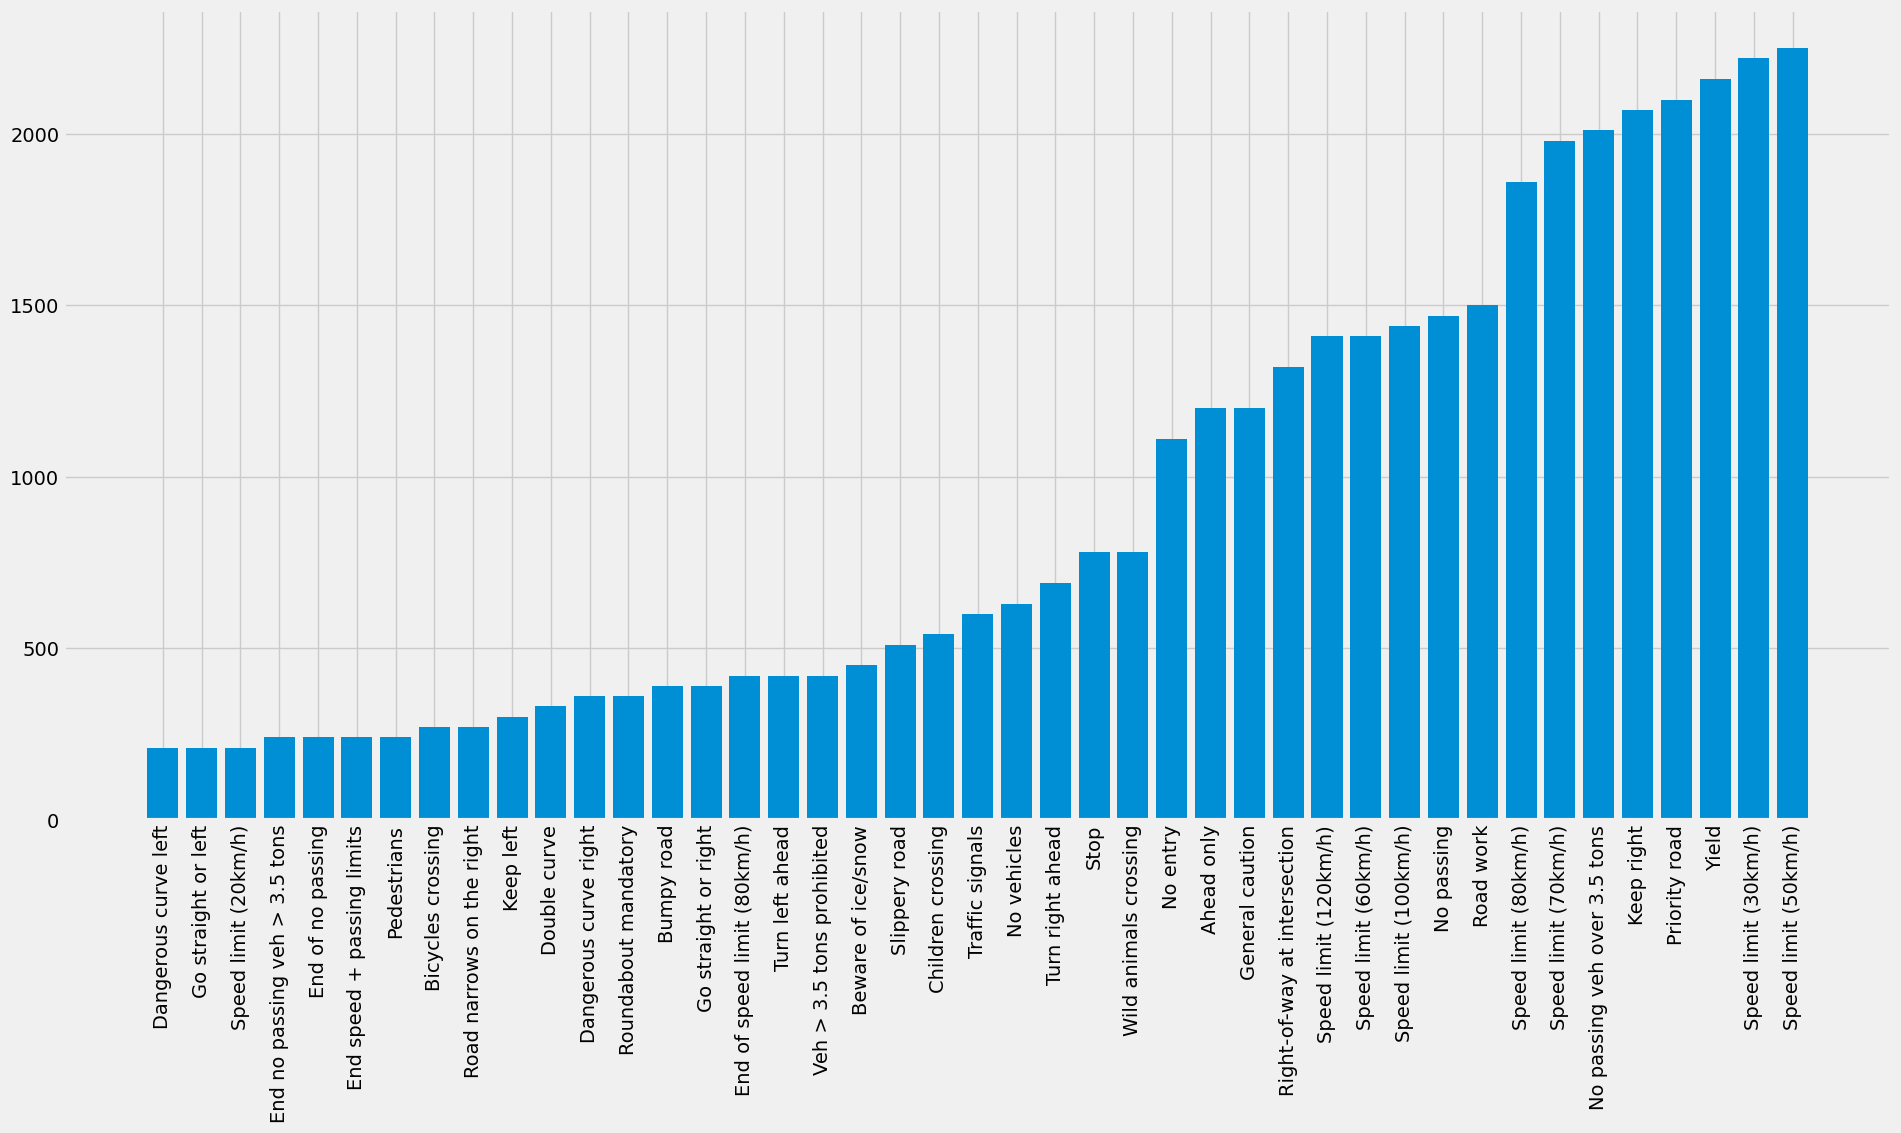

In [ ]:
# 시각화
plt.figure(figsize = (21, 10))
plt.bar(class_num, train_num)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [ ]:
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img) # 이미지를 넘파이 배열로 변환
            images.append(image)
            labels.append(category)

    return images, labels

images, labels = load_data(train_path)


In [ ]:
# labels에 원핫 인코딩 진행
labels = to_categorical(labels)

# 트레인, 테스트 셋 데이터 나누기
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.4)

In [ ]:
model = Sequential()

# 첫번째 Convolutional Layer : 입력 데이터로부터 특징을 추출
model.add(Conv2D(filters=32,
                 kernel_size=3,
                 activation='relu',
                 input_shape=(30,30,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# 두번째 Convolutional Layer
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25)) # 인풋데이터의 25%를 무작위로 0으로 만듦

# 세번째 Convolutional Layer
# 특징을 추출하는 기능을 하는 필터, 비선형 값으로 바꿔주는 activation 함수->relu
model.add(Conv2D(filters=64,
                 kernel_size=3,
                 activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

In [ ]:
# Flattening the layer and adding Dense Layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 64)         

In [ ]:
# 모델 컴파일 하기
model.compile(
    loss='categorical_crossentropy', # 다중분류의 로스 함수
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
# 모델 핏하기
history = model.fit(x_train,
                    y_train,
                    validation_data = (x_test, y_test),
                    epochs=30,
                    steps_per_epoch=60
                   )

Epoch 1/30
60/60 [==============================] - 8s 48ms/step - loss: 6.2211 - accuracy: 0.0372 - val_loss: 3.5325 - val_accuracy: 0.0935
Epoch 2/30
60/60 [==============================] - 2s 28ms/step - loss: 3.3046 - accuracy: 0.1519 - val_loss: 2.8587 - val_accuracy: 0.3038
Epoch 3/30
60/60 [==============================] - 2s 27ms/step - loss: 2.4644 - accuracy: 0.3765 - val_loss: 1.8722 - val_accuracy: 0.5439
Epoch 4/30
60/60 [==============================] - 2s 27ms/step - loss: 1.7593 - accuracy: 0.5418 - val_loss: 1.2644 - val_accuracy: 0.6978
Epoch 5/30
60/60 [==============================] - 2s 27ms/step - loss: 1.1908 - accuracy: 0.6752 - val_loss: 0.7586 - val_accuracy: 0.8198
Epoch 6/30
60/60 [==============================] - 2s 27ms/step - loss: 0.8051 - accuracy: 0.7683 - val_loss: 0.5352 - val_accuracy: 0.8710
Epoch 7/30
60/60 [==============================] - 2s 28ms/step - loss: 0.6173 - accuracy: 0.8189 - val_loss: 0.4016 - val_accuracy: 0.9009
Epoch 8/30
60

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

491/491 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9846
test set accuracy:  98.46340417861938


In [ ]:
#테스트 데이터 정확도
Y_test = pd.read_csv('/content/Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

a =  pathlib.Path('/content/')

output = list()
for img in test_images:
    image = load_img(os.path.join(a, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
y_prob = model.predict(X_test)
pred = y_prob.argmax(axis=-1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 1s 2ms/step
Test Data accuracy:  93.61836896278702


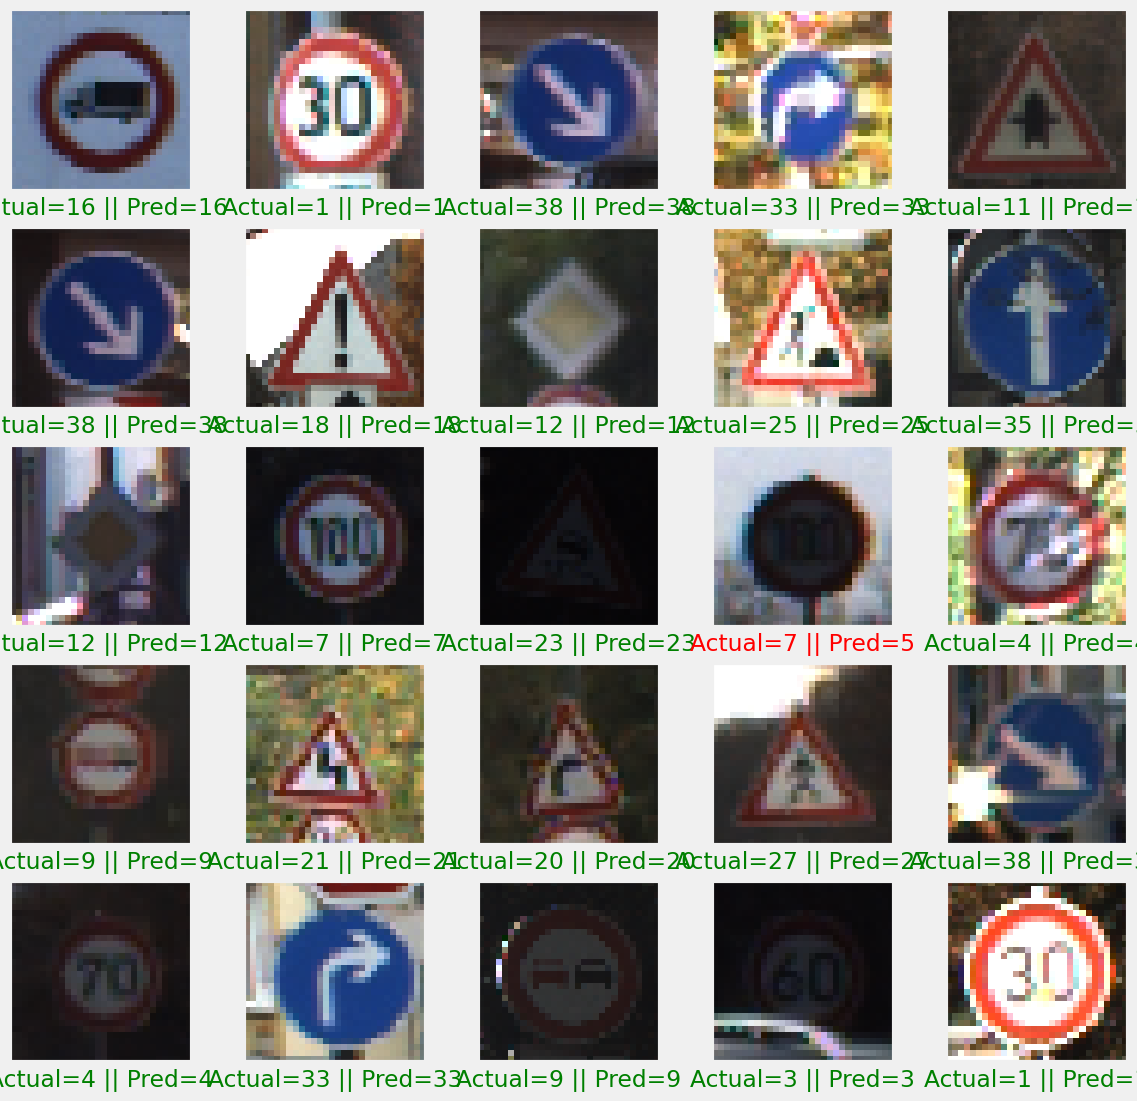

In [ ]:
#분류모델 정확도
plt.figure(figsize = (13, 13))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

In [ ]:
#1. 모델 컴파일(categorical_crossentropy)
cnn=Sequential()

cnn.compile(loss='spare_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
#2. 모델학습
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

checkpoint= ModelCheckpoint(filepath='cnn.weights.spara_categorical.hdf5',
                            vervose =1,
                            save_best_only=True)
hist2 = cnn.fit(x_train, y_train_encoded,
                 batch_size=256,
                 epochs=250,
                 validation_data=(x_val, y_val),
                 callbacks=[checkpoint],
                 verbose=2,
                 shuffle=True)



> CNN 모델이 정확도는 높고, 오버피팅도 거의 발생하지 않는 모델
> CNN 모델은 2개의 컨볼루션 레이어와 1개의 폴링 레이어 : 70.55%


> **오버피팅 점점 증가**
# ImageDatGenerator을 이용해 변화
- 7개의 컨볼루션레이어
- 5개 폴링 레이어
## 더 높은 레이어를 쌓아보면?




# CIFAR10 CNN(sklearn)

In [ ]:
#1. 라이브러리

import numpy as np
from scipy import misc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import cv2
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as matimage
%matplotlib inline

In [ ]:
#2. 데이터 로딩 및 분리

train = pd.read_csv('fashion_dataset/train.csv')
test = pd.read_csv('fashion_dataset/test.csv')

X_train = np.array(train.iloc[:, 1:])
y_train = np.array(train.iloc[:, 0])
X_test =  np.array(test.iloc[:, 1:])
y_test = np.array(test.iloc[:, 0])
train.shape

In [ ]:
#2-1. 데이터 확인

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [ ]:
#3. 데이터 전처리

from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
#3-1 데이터 Normalized 확인

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [ ]:
#3-2 고유벡터, 고유값, 공분산 행렬 계산

mean_vec = np.mean(X_train, axis=0)
cov_mat = np.cov(X_train.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("Shape of Covariance matrix", cov_mat.shape)
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse=True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [ ]:
#3-3 앞에서 400개 성분 평균 분산
add =0.0
for i in range(400):
    add+= var_exp[i]

print('first 400 components average variance: %.2f' % add)

In [ ]:
#4. 차원축소(PCA)

from sklearn.decomposition import PCA

n_components = 400
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [ ]:
#4-1 이미지 확인
eigenvalues = pca.components_.reshape(n_components, 28, 28)
eigenvalues = pca.components_
print("Eigenvalues shape:", eigenvalues.shape)

n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(eigenvalues[i,:].reshape(28,28), cmap="gray")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

##Classification

In [ ]:
#1. classification

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

In [ ]:
#2. Gaussioan classifier
gNB = GaussianNB()
gNB.fit(X_train_pca,y_train)
nb_predict = gNB.predict(X_test_pca)

print(metrics.classification_report(y_test, nb_predict))
accuracy = metrics.accuracy_score(y_test, nb_predict)
average_accuracy = np.mean(y_test == nb_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
#3. SVM classifier
svm = SVC()
svm.fit(X_train_pca,y_train)
svm_predict = svm.predict(X_test_pca)

print(metrics.classification_report(y_test, svm_predict))
accuracy = metrics.accuracy_score(y_test, svm_predict)
average_accuracy = np.mean(y_test == svm_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
#4. MLP classifier
MLP= MLPClassifier()
MLP.fit(X_train_pca,y_train)
mlp_predict = MLP.predict(X_test_pca)

print(metrics.classification_report(y_test, mlp_predict))
accuracy = metrics.accuracy_score(y_test, mlp_predict)
average_accuracy = np.mean(y_test == mlp_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

## 2진화 처리


In [ ]:
#1. 2진화 처리
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()
train_binary = binarizer.fit_transform(X_train)
test_binary = binarizer.fit_transform(X_test)
train_binary.shape

In [ ]:
#1-1 이미지출력
n_row = 1
n_col = 5
plt.figure(figsize=(10,8))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(train_binary[i,:].reshape(28,28), cmap="binary")
    title_text = "Image" + str(i+1)
    plt.title(title_text, size=6.5)

plt.show()

In [ ]:
#2. Gaussioan classifier
gNB = GaussianNB()
gNB.fit(train_binary,y_train)
nb_predict = gNB.predict(test_binary)

print(metrics.classification_report(y_test, nb_predict))
accuracy = metrics.accuracy_score(y_test, nb_predict)
average_accuracy = np.mean(y_test == nb_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
#3. SVM
svm = SVC()
svm.fit(train_binary,y_train)
svm_predict = svm.predict(test_binary)

print(metrics.classification_report(y_test, svm_predict))
accuracy = metrics.accuracy_score(y_test, svm_predict)
average_accuracy = np.mean(y_test == svm_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
# MLP
# 하나의 레이어와 100개의 뉴런 사용
MLP= MLPClassifier()
MLP.fit(train_binary,y_train)
mlp_predict = MLP.predict(test_binary)

print(metrics.classification_report(y_test, mlp_predict))
accuracy = metrics.accuracy_score(y_test, mlp_predict)
average_accuracy = np.mean(y_test == mlp_predict) * 100
print("The average_accuracy is {0:.1f}%".format(average_accuracy))

In [ ]:
#1. 전처리

from tensorflow.keras.datasets import fashion_mnist
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [ ]:
#1-1 데이터셋 분리
# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#1-2. 스케일링 및 형변환
def get_preprocessed_data(images, labels):
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형.
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)

    return images, labels

In [ ]:
#1-3 원핫인코딩
# 0 ~ 1사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    # OHE 적용
    oh_labels = to_categorical(labels)
    return images, oh_labels

In [ ]:
#학습,검증 데이터 분리
# 학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    # 학습 및 테스트 데이터 세트를  0 ~ 1사이값 float32로 변경 및 OHE 적용.
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)

    # 학습 데이터를 검증 데이터 세트로 다시 분리
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels )

In [ ]:
#1-5. 데이터 분리(학습/검증)
# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성.

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
    get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_labels.shape)